In [1]:
import os
import blib
import numpy as np
import matplotlib

In [2]:
# Read a color chart image, make a mutable copy
cc = matplotlib.image.imread('blob/ios-1.png')

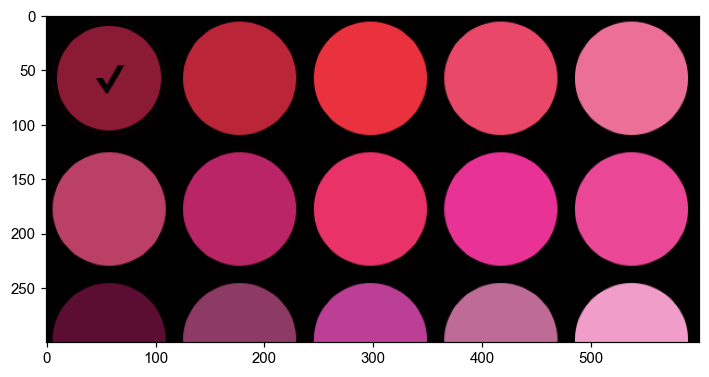

In [3]:
matplotlib.pyplot.imshow(cc[:300, :, :])

cmap = []

In [4]:
im = np.array(cc.copy(), dtype=np.float)

# Dimension on each side to extract color
n = 5
i = np.arange(5 * 21)
xx = [int(s) for s in (i % n) * 120 + 30]
yy = [int(s) for s in np.floor(i / n) * 120 + 50]

for x, y in list(zip(xx, yy)):
    # Compute average of the patch
    patch = im[y:y+n, x:x+n, :]
    clr = np.mean(patch, axis=(0, 1))

    # Draw a box around the patch that is used
    im[y-1    , x-1:x+n+1, :] = 1.0
    im[y+n    , x-1:x+n+1, :] = 1.0
    im[y-1:y+n+1, x-1    , :] = 1.0
    im[y-1:y+n+1, x+n    , :] = 1.0
    
    cmap.append(clr)
    
    # Show the values
    #print('[{:.4f} {:.4f} {:.4f} {:.4f}] -> [{:.4f} {:.4f} {:.4f} {:.4f}]'.format(patch[0, 0, 0], patch[0, 0, 1], patch[0, 0, 2], patch[0, 0, 3], clr[0], clr[1], clr[2], clr[3]))

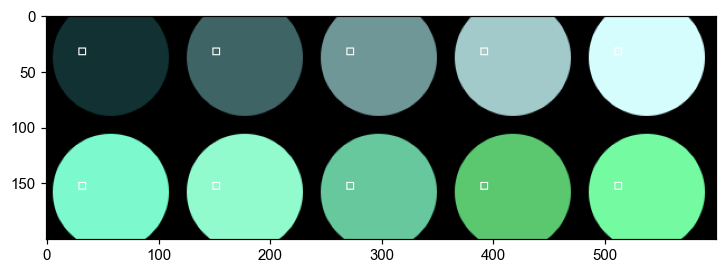

In [5]:
matplotlib.pyplot.imshow(im[-200:, :, :])

In [6]:
# Truncate the last row (5 elements) since it is repeated in the next image
cmap = cmap[:-5]

In [7]:
cc = matplotlib.image.imread('blob/ios-2.png')

In [8]:
im = np.array(cc.copy(), dtype=np.float)

# Dimension on each side to extract color
n = 5
i = np.arange(5 * 21)
xx = [int(s) for s in (i % n) * 120 + 30]
yy = [int(s) for s in np.floor(i / n) * 120 + 50]

for x, y in list(zip(xx, yy)):
    # Compute average of the patch
    patch = im[y:y+n, x:x+n, :]
    clr = np.mean(patch, axis=(0, 1))

    # Draw a box around the patch that is used
    im[y-1    , x-1:x+n+1, :] = 1.0
    im[y+n    , x-1:x+n+1, :] = 1.0
    im[y-1:y+n+1, x-1    , :] = 1.0
    im[y-1:y+n+1, x+n    , :] = 1.0
    
    cmap.append(clr)

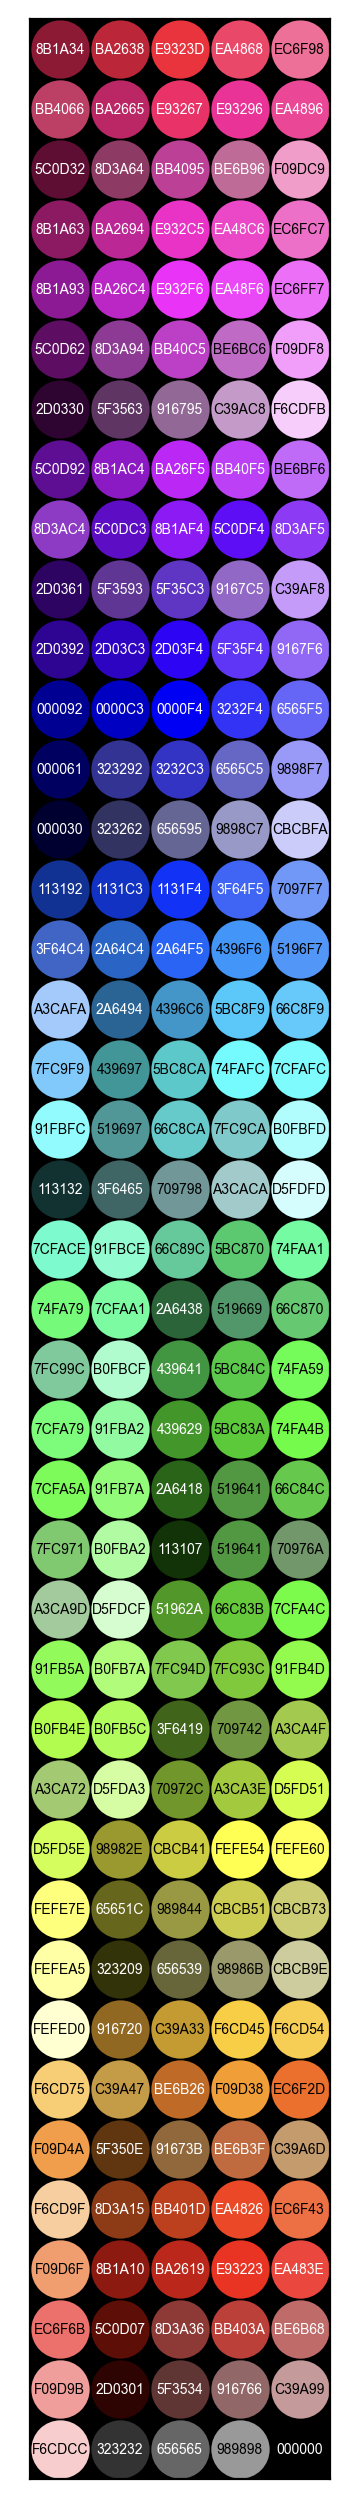

In [9]:
M = 5

fig = matplotlib.pyplot.figure(figsize=(0.3 * M, 0.3 * int(np.ceil(len(cmap) / M))), dpi=200, frameon=False)
ax = fig.add_axes([0, 0, 1, 1], facecolor='k')

for i in range(len(cmap)):
    x = float(i % M)
    y = float(int(i / M))
    rgb = [int(255 * c) for c in cmap[i]]
    if (0.2126 * rgb[0] + 0.7152 * rgb[1] + 0.0722 * rgb[2]) >= 128:
        fc = 'k'
    else:
        fc = 'w'
    matplotlib.pyplot.plot(x, y, '.', markersize=40, color=cmap[i])
    matplotlib.pyplot.text(x, y, '{:02X}{:02X}{:02X}'.format(rgb[0], rgb[1], rgb[2]), color=fc, size=5, ha='center', va='center')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim([-0.5, M - 0.5])
ax.set_ylim([-0.5, np.ceil(len(cmap) / M) - 0.5])
ax.invert_yaxis()
fig.savefig(os.path.expanduser('blob/ios-color-code.png'))